Historical Airport Weather

In [1]:
library("stringr")
MyData <- read.csv(file="1209797417742dat.txt", header=FALSE, sep=",")
#MyData[4400:4550,c(3,4,8,12,16,18,22,24,28,30,34,36)]

In [2]:
rowtest<-MyData[6:60,]
indices<-apply(rowtest,1,function(x) as.numeric(x[which(x==x[8])[2]-2]))

In [3]:
times<-MyData[,c(3,4)]
times[,2]<-str_pad(times[,2],4,pad='0')
rowtimes<-strptime(paste(times[,1],times[,2],sep=""), tz = "UTC", "%Y%m%d%H%M")


In [4]:
startind<-50000
endind<-100000
xplot<-rowtimes[startind:endind]
yplot<-MyData[startind:endind,8]

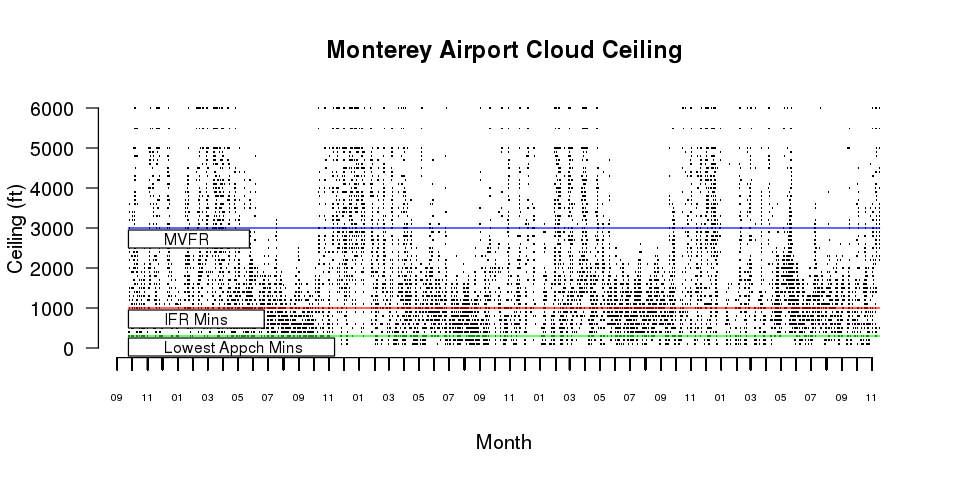

In [5]:
options(repr.plot.width=8, repr.plot.height=4)
plot(xplot,3.28*yplot,ylim=c(0,6000),xlab="Month",ylab="Ceiling (ft)",pch=".",axes=F)
axis(side=2,las=2)
axis.POSIXct(side=1, at=cut(xplot, "months"), format="%m", cex.axis=0.5)
lines(xplot,rep(300,(endind-startind+1)),type="l",col="green")
lines(xplot,rep(1000,(endind-startind+1)),type="l",col="red")
lines(xplot,rep(3000,(endind-startind+1)),type="l",col="blue")
legend(c(as.numeric(xplot[1]),as.numeric(xplot[14000])),c(-200,250),"Lowest Appch Mins",cex=0.8)
legend(c(as.numeric(xplot[1]),as.numeric(xplot[9000])),c(500,950),"IFR Mins",cex=0.8)
legend(c(as.numeric(xplot[1]),as.numeric(xplot[8000])),c(2500,2950),"MVFR",cex=0.8)
title("Monterey Airport Cloud Ceiling")